In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
#import sklearn

np.random.seed(101) 
tf.set_random_seed(101) 

In [10]:
#Intro to sessions

first_string = tf.constant('Tensor')
second_string = tf.constant('flow')
print(type(first_string)) #It is a Tensor Object and not a string

combined_string = first_string + second_string
print(combined_string)

matrix_1 = tf.constant([[1,2], [1,2]])
matrix_2 = tf.constant([[1,3], [3,2]])

mul_matrix = tf.matmul(matrix_1, matrix_2)

with tf.Session() as session:
    result = session.run(combined_string)
    print(result)
    print("Output for matrix multiplication:")
    mul = session.run(mul_matrix)
    print(mul)

#The graphs define computation. In the data flow graph, each node performs an operation with some inputs, they generate outputs of this operation.

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("add_2:0", shape=(), dtype=string)
b'Tensorflow'
Output for matrix multiplication:
[[7 7]
 [7 7]]


In [11]:
#variable definitions

first_variable = tf.Variable(5)
print(type(first_variable))

initialize = tf.global_variables_initializer() #Very important step. All used variables(even if constant) should be initialised.

with tf.Session() as session:
    initialize.run()
    print(first_variable.eval())

<class 'tensorflow.python.ops.variables.RefVariable'>
5


In [12]:
#Placeholder beginning

random_data = np.random.uniform(0,100,(3,3))
random_weights = np.random.uniform(0,100,(3,1))

print(random_data)
print("Random weights associated:")
print(random_weights)

print()

placeholder_one = tf.placeholder(tf.float32)
placeholder_two = tf.placeholder(tf.float32)

add = placeholder_one + placeholder_two
mul = placeholder_one * placeholder_two

with tf.Session() as session:
    add_result = session.run(add, {placeholder_one:random_data, placeholder_two:random_weights})
    mul_result = session.run(mul, {placeholder_one:random_data, placeholder_two:random_weights})
    
    print(add_result)
    print()
    print(mul_result)


[[51.63986277 57.06675869  2.84742265]
 [17.15216562 68.52769817 83.38968626]
 [30.69662197 89.36130797 72.15438618]]
Random weights associated:
[[18.99389542]
 [55.42275911]
 [35.2131954 ]]

[[ 70.63376   76.06065   21.841316]
 [ 72.57493  123.950455 138.81244 ]
 [ 65.90982  124.5745   107.367584]]

[[ 980.8421   1083.9199     54.083645]
 [ 950.6204   3797.994    4621.6865  ]
 [1080.9261   3146.697    2540.7866  ]]


500


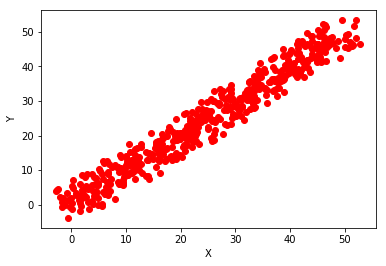

In [24]:
#Simple ML problem using tensorflow(1)


#Random Data generation
x = np.linspace(0, 50, 500) 
y = np.linspace(0, 50, 500) 
  

x += np.random.uniform(-4, 4, 500) 
y += np.random.uniform(-4, 4, 500) 
  
n = len(x)
print(n)

#Plotting the Data
plt.scatter(x,y, color = 'Red'), plt.xlabel("X"), plt.ylabel("Y")
plt.show()

In [25]:
#Simple ML problem using tensorflow(2)

#Defining Placeholders for X and Y
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#Weight and Bias
weight = tf.Variable(np.random.randn()) 
bias = tf.Variable(np.random.randn()) 

#learning rate and ephocs
learning_rate = 0.1
training_epochs = 1000

In [27]:
#Simple ML problem using tensorflow(3)

#Hypothesis function y = weight*x + bias
y_pred = tf.add(tf.multiply(weight, X), bias)

#Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
initialize = tf.global_variables_initializer() 

Instructions for updating:
Use tf.cast instead.


In [32]:
#Simple ML problem using tensorflow(4)

#Tensorflow Session

with tf.Session() as session:
    initialize.run()
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            session.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 100 == 0: 
            # Calculating the cost a every epoch 
            c = session.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "Weight =", session.run(weight), "bias =", session.run(bias)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = session.run(cost, feed_dict ={X: x, Y: y}) 
    weight_ref = session.run(weight) 
    bias_ref = session.run(bias) 

Epoch 100 : cost = 6.0440664 Weight = 0.89915335 bias = 1.9333947
Epoch 200 : cost = 6.094841 Weight = 0.8883013 bias = 2.4869776
Epoch 300 : cost = 6.1230383 Weight = 0.8856737 bias = 2.6210165
Epoch 400 : cost = 6.1307907 Weight = 0.88503826 bias = 2.6534324
Epoch 500 : cost = 6.1327124 Weight = 0.88488513 bias = 2.6612446
Epoch 600 : cost = 6.133196 Weight = 0.88484687 bias = 2.663194
Epoch 700 : cost = 6.133345 Weight = 0.88483506 bias = 2.6637974
Epoch 800 : cost = 6.1333766 Weight = 0.8848326 bias = 2.6639225
Epoch 900 : cost = 6.133378 Weight = 0.8848323 bias = 2.663939
Epoch 1000 : cost = 6.133378 Weight = 0.8848323 bias = 2.663939


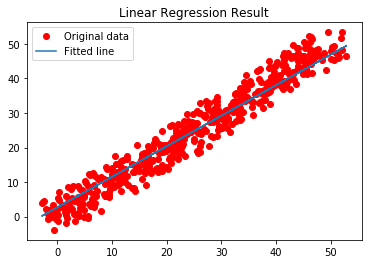

In [44]:
#Simple ML problem using tensorflow(5)

# Calculating the predictions 
predictions = weight_ref * x + bias_ref 

# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') ,plt.plot(x, predictions, label ='Fitted line') , plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
